<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 2.4 - Maximum Likelihood Estimation

### Thomas Derr

In [ ]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

## MLE for Random Samples

The MLE (maximum likelihood estimate) of a probability distribution is a point in its parameter space that maximizes the likelihood function.

If we have $X_1, X_2, ..., X_n$ with a joint pmf/pdf of

$f(x_1, x_2, ..., x_n; \theta_1, \theta_2, ..., \theta_m)$

which is a function of $\theta_1, \theta_2, ..., \theta_m$ with sample values of $x_1, x_2, ..., x_n$. This is the likelihood function we seek to maximize

i.e., we wish to find $\hat{\theta}_1, \hat{\theta}_2, ..., \hat{\theta}_m$ such that

$f(x_1, x_2, ..., x_n; \hat{\theta}_1, \hat{\theta}_2, ..., \hat{\theta}_m) \geq f(x_1, x_2, ..., x_n; \theta_1, \theta_2, ..., \theta_m)$ for all possible $\theta_1, \theta_2, ..., \theta_m$


Optimization terminated successfully.
         Current function value: -46.113473
         Iterations: 12
         Function evaluations: 70
         Gradient evaluations: 14


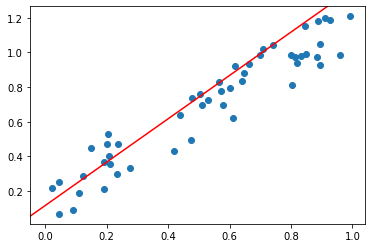

In [ ]:
X = np.random.rand(50)
Y = np.random.rand(50)
dat = X+ (np.divide([Y], 3))

# Helper functions  from
# https://jekel.me/2016/Maximum-Likelihood-Linear-Regression/
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))*np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

def function(var):
    yGuess = (var[2]*(X**2)) + (var[1]*X) + var[0]
    return -1 * calcLogLikelihood(yGuess, dat[0], float(len(yGuess)))

mle = minimize(function, [0.2, 0.5, 0.8], method='BFGS', options={'disp': True})

fig, ax = plt.subplots()
ax.scatter(X, dat)
ax.axline((0, mle.x[0]), slope = mle.x[1], color='red')

## Linear Regression

Like we explained in previous homework, in linear regresion, if we are given $n$ data points $(x_1, y_1), (x_2, y_2), ... ,(x_n, y_n)$, we wish to find coefficients $\beta_1, ..., \beta_p$ so as to minimize

$\sum \limits _{i=1} ^n (y_i - \hat{y}_i)^2$

For each $\hat{y}_i$ where

$\hat{y}_i = \beta_0 + \beta_1x_{i1}+ ... + \beta_px_{ip}$


If we think of this probabilistically, this is an attempt to find a function with a maximized pdf so as to fit the given data, i.e. we want a maximum likelihood estimate of the pdf

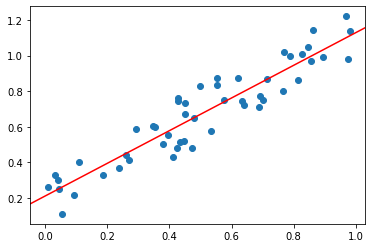

In [ ]:
A = np.stack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, dat[0], rcond=None)[0]

fig, ax = plt.subplots()
ax.scatter(X, dat)
ax.axline((0, c), slope = m, color='red')

As can be seen, both the direct least squares method, and the MLE method can be used to estimate a function to fit the given points